In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process.
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])

    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:

# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.170972, W: 0.199190, b: 1.170611
step: 100, loss: 0.167279, W: 0.205192, b: 1.128062
step: 150, loss: 0.164383, W: 0.210507, b: 1.090383
step: 200, loss: 0.162112, W: 0.215213, b: 1.057016
step: 250, loss: 0.160331, W: 0.219381, b: 1.027467
step: 300, loss: 0.158934, W: 0.223072, b: 1.001299
step: 350, loss: 0.157839, W: 0.226341, b: 0.978126
step: 400, loss: 0.156980, W: 0.229235, b: 0.957605
step: 450, loss: 0.156306, W: 0.231799, b: 0.939432
step: 500, loss: 0.155778, W: 0.234069, b: 0.923339
step: 550, loss: 0.155363, W: 0.236079, b: 0.909087
step: 600, loss: 0.155039, W: 0.237859, b: 0.896466
step: 650, loss: 0.154784, W: 0.239435, b: 0.885290
step: 700, loss: 0.154584, W: 0.240832, b: 0.875392
step: 750, loss: 0.154427, W: 0.242068, b: 0.866628
step: 800, loss: 0.154304, W: 0.243163, b: 0.858866
step: 850, loss: 0.154208, W: 0.244132, b: 0.851993
step: 900, loss: 0.154132, W: 0.244991, b: 0.845905
step: 950, loss: 0.154073, W: 0.245751, b: 0.840515
step: 1000, l

In [8]:
import matplotlib.pyplot as plt

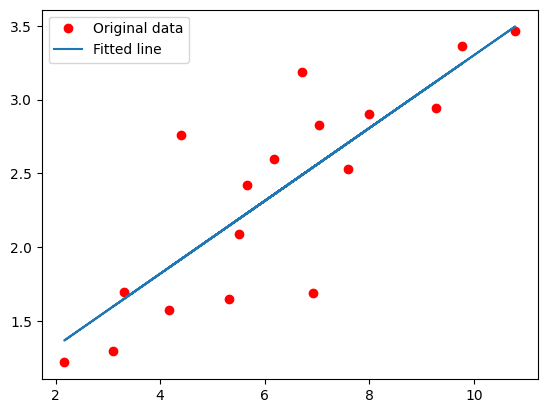

In [10]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

Multivariant_Linear_Regression

In [12]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Set random seed for reproducibility
rng = np.random
tf.random.set_seed(42)

In [27]:
# Multivariate Training Data (Multiple features X) - ensure float32 type
X = np.array([[3.3, 1.0], [4.4, 2.2], [5.5, 3.1], [6.71, 1.8], [6.93, 2.3],
              [4.168, 3.2], [9.779, 2.0], [6.182, 1.2], [7.59, 4.3], [2.167, 3.8],
              [7.042, 1.9], [10.791, 2.6], [5.313, 2.1], [7.997, 3.5],
              [5.654, 1.7], [9.27, 3.1], [3.1, 4.0]], dtype=np.float32)

# Corresponding target values (Y) - ensure float32 type
Y = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
              2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3], dtype=np.float32)

In [28]:
# Initialize Weight and Bias with random values - ensure float32 type
W = tf.Variable(rng.randn(2).astype(np.float32), name="weight")  # Two weights for two features
b = tf.Variable(rng.randn(1).astype(np.float32), name="bias")

In [29]:
# Multivariate linear regression model (Wx + b)
def linear_regression(X):
    return tf.reduce_sum(W * X, axis=1) + b  # Sum of Wx for all features

In [30]:
# Mean square error (Loss function)
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [31]:
# Stochastic Gradient Descent (SGD) Optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [32]:
# Optimization process
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients for W and b
    gradients = g.gradient(loss, [W, b])

    # Update W and b
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [33]:
# Hyperparameters for training
training_steps = 1000
display_step = 100

# Lists to store W, b, and loss for plotting
W_list = []
b_list = []
loss_list = []

In [34]:
for step in range(1, training_steps + 1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %s, b: %f" % (step, loss, W.numpy(), b.numpy()))

        # Store W, b, and loss for plotting
        W_list.append(W.numpy())
        b_list.append(b.numpy())
        loss_list.append(loss.numpy())

<ipython-input-34-c89f20cd6ef3>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("step: %i, loss: %f, W: %s, b: %f" % (step, loss, W.numpy(), b.numpy()))


step: 100, loss: 0.151206, W: [ 0.28545094 -0.0433125 ], b: 0.668882
step: 200, loss: 0.147272, W: [ 0.28311467 -0.06016118], b: 0.729039
step: 300, loss: 0.144204, W: [ 0.2792814  -0.07072281], b: 0.783258
step: 400, loss: 0.141778, W: [ 0.2758095 -0.0799574], b: 0.831503
step: 500, loss: 0.139859, W: [ 0.27271953 -0.08816424], b: 0.874410
step: 600, loss: 0.138341, W: [ 0.2699715  -0.09546269], b: 0.912568
step: 700, loss: 0.137141, W: [ 0.26752758 -0.10195336], b: 0.946503
step: 800, loss: 0.136191, W: [ 0.26535413 -0.10772574], b: 0.976683
step: 900, loss: 0.135440, W: [ 0.2634212  -0.11285926], b: 1.003522
step: 1000, loss: 0.134847, W: [ 0.26170218 -0.11742468], b: 1.027392


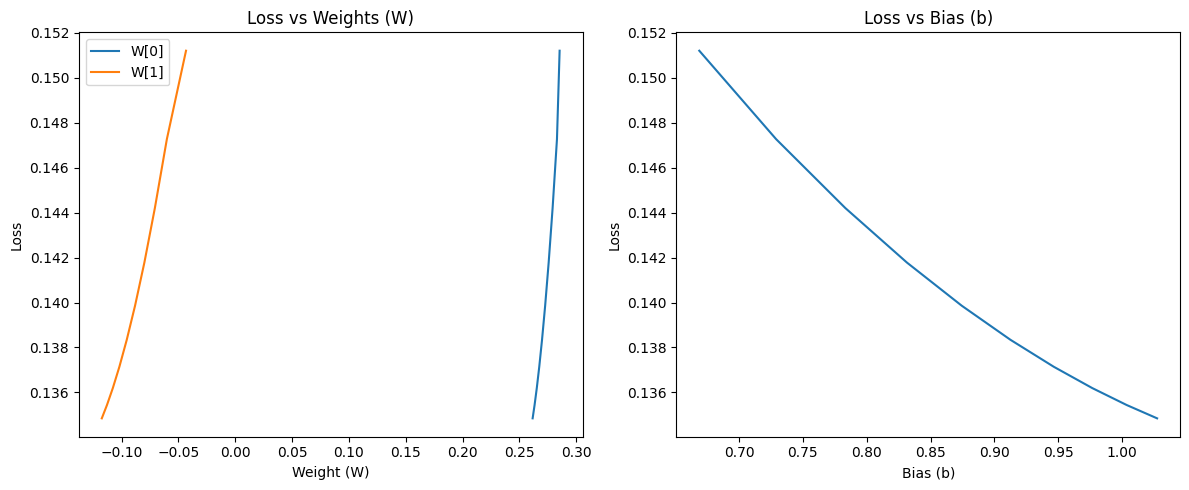

In [35]:
# Plot loss vs W and loss vs b
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for W vs Loss
ax[0].plot([W[0] for W in W_list], loss_list, label="W[0]")
ax[0].plot([W[1] for W in W_list], loss_list, label="W[1]")
ax[0].set_xlabel("Weight (W)")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].set_title("Loss vs Weights (W)")

# Plot for b vs Loss
ax[1].plot(b_list, loss_list)
ax[1].set_xlabel("Bias (b)")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss vs Bias (b)")

plt.tight_layout()
plt.show()

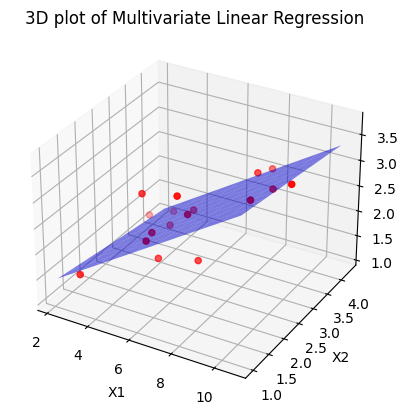

In [36]:
# Plot original data and fitted line in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of original data
ax.scatter(X[:, 0], X[:, 1], Y, color='red', label='Original Data')

# Generate fitted line
X1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
X2 = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
X1, X2 = np.meshgrid(X1, X2)
Y_pred = W[0].numpy() * X1 + W[1].numpy() * X2 + b.numpy()

# Plot 3D surface for fitted line
ax.plot_surface(X1, X2, Y_pred, color='blue', alpha=0.5)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("3D plot of Multivariate Linear Regression")

plt.show()

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [39]:
!git config --global user.name "yuvrajpant56"

In [40]:
!git config --global user.email "yuvrajpant5@gmail.com"

In [41]:
!git clone https://github.com/yuvrajpant56/Tensor_Flow_Linear_Regression.git

Cloning into 'Tensor_Flow_Linear_Regression'...


In [43]:
%cd Tensor_Flow_Linear_Regression/

/content/Tensor_Flow_Linear_Regression


In [47]:
!cp /content/drive/MyDrive/Linear_Regression_Example.ipynb


cp: missing destination file operand after '/content/drive/MyDrive/Linear_Regression_Example.ipynb'
Try 'cp --help' for more information.
